Check if virtual environment is correct

In [170]:
import sys
print(sys.prefix)
sys.prefix != sys.base_prefix # Should result in true

/home/addy/Desktop/Heart-Disease-Prediction-Capstone-Project-Group-55/.venv


True

Importing Libraries

In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

Reading dataset and displaying first 5 values

In [172]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Identifying datatypes

In [173]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Converting the "object" dtypes into "string" dtype

In [174]:
string_col = df.select_dtypes(include="object").columns
df[string_col] = df[string_col].astype("string")

In [175]:
df.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

Removing string dtypes and output column from dataset

In [176]:
string_col = df.select_dtypes("string").columns.to_list() 
num_col = df.columns.to_list()
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

Describing the dataframe

In [177]:
df.describe().T
# T does a transpose of the table for display

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Correlation Matrix

In [178]:
px.imshow(df.corr(numeric_only=True), title="Correlation Plot of Heart Disease Prediction")

Distribution of Heart Disease (Male to Female)

In [179]:
fig = px.histogram(df, 
                   x="HeartDisease", 
                   color="Sex", 
                   hover_data=df.columns,
                   title="Distribution of Heart Disease",
                   barmode="group")
fig.show()

Types of Chest Pain

In [180]:
fig = px.histogram(df,
                   x = "ChestPainType",
                   color="Sex",
                   hover_data=df.columns,
                   title="Types of Chest Pain")
fig.show()

Sex Ratio of Dataset

In [181]:
fig = px.histogram(df,
                   x="Sex",
                   hover_data=df.columns,
                   title="Sex Ratio in the Data")
fig.show()

Distribution of Resting ECG

In [182]:
fig=px.histogram(df,
                 x="RestingECG",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG")
fig.show()

Multiple Pairwise Bivariate Distributions in the Dataset

[]

<Figure size 1500x1000 with 0 Axes>

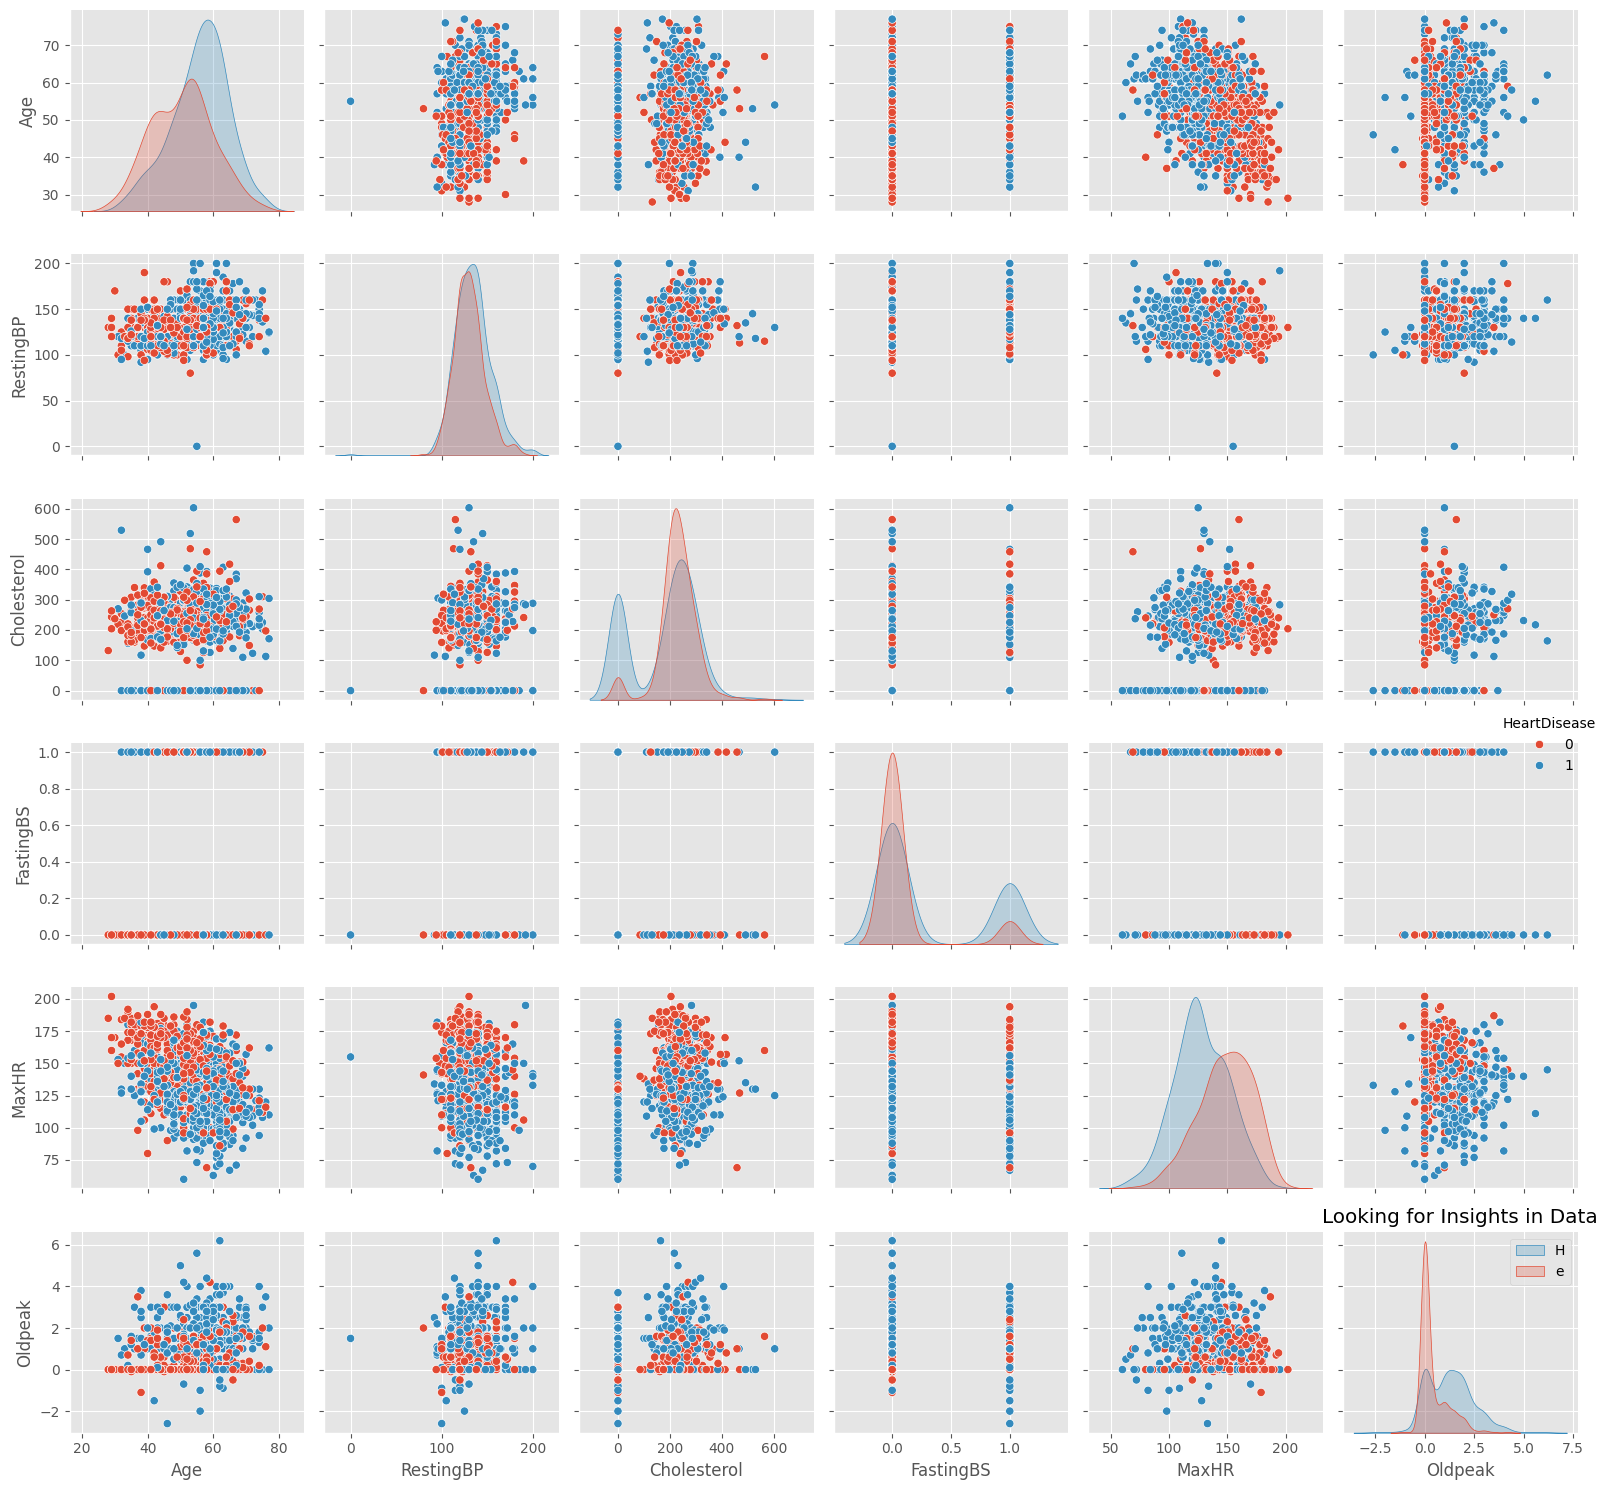

In [183]:
plt.figure(figsize=(15,10))
sns.pairplot(df, hue='HeartDisease')
plt.title("Looking for Insights in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

Linearity of the Variables

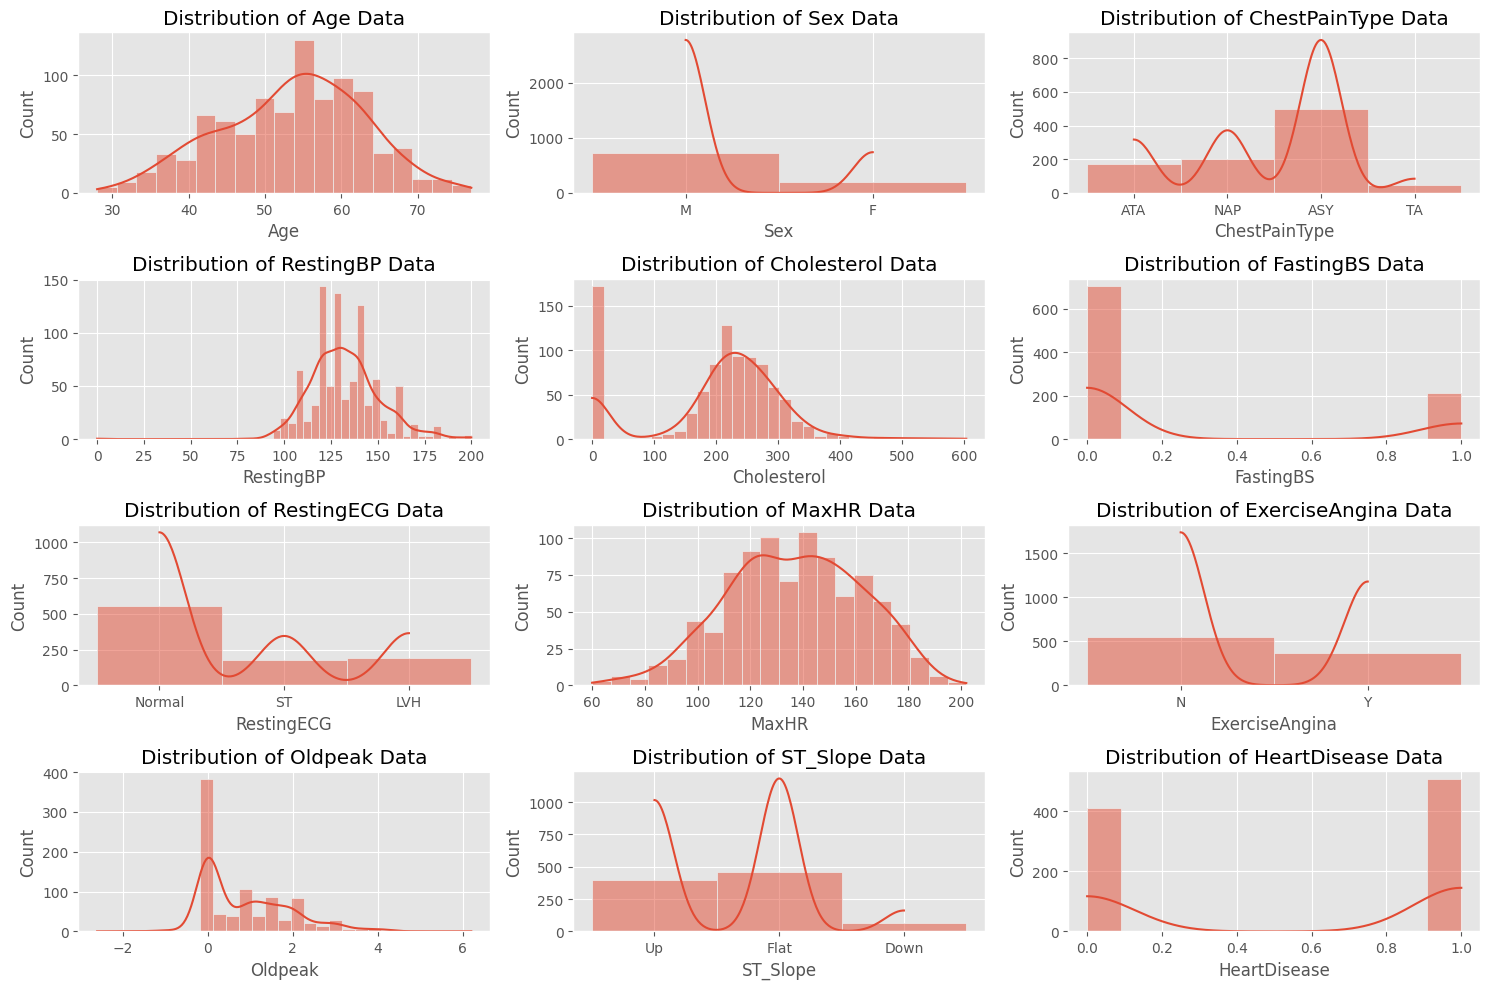

In [184]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
    plt.plot()

Outliers:

In [185]:
fig = px.box(df, y="Age", x="HeartDisease", title="Distribution of Age")
fig.show()

In [186]:
fig = px.box(df, y="RestingBP", x="HeartDisease", title="Distribution of RestingBP", color="Sex")
fig.show()

In [187]:
fig = px.box(df, y="Cholesterol", x="HeartDisease", title="Distribution of Cholesterol")
fig.show()

In [188]:
fig = px.box(df, y="Oldpeak", x="HeartDisease", title="Distribution of Oldpeak")
fig.show()

In [189]:
fig = px.box(df, y="MaxHR", x="HeartDisease", title="Distribution of MaxHR")
fig.show()

Data Preprocessing

Handling Null Values:

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [191]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no NULL or missing values in our dataset

Feature Scaling:

Robust Scaler


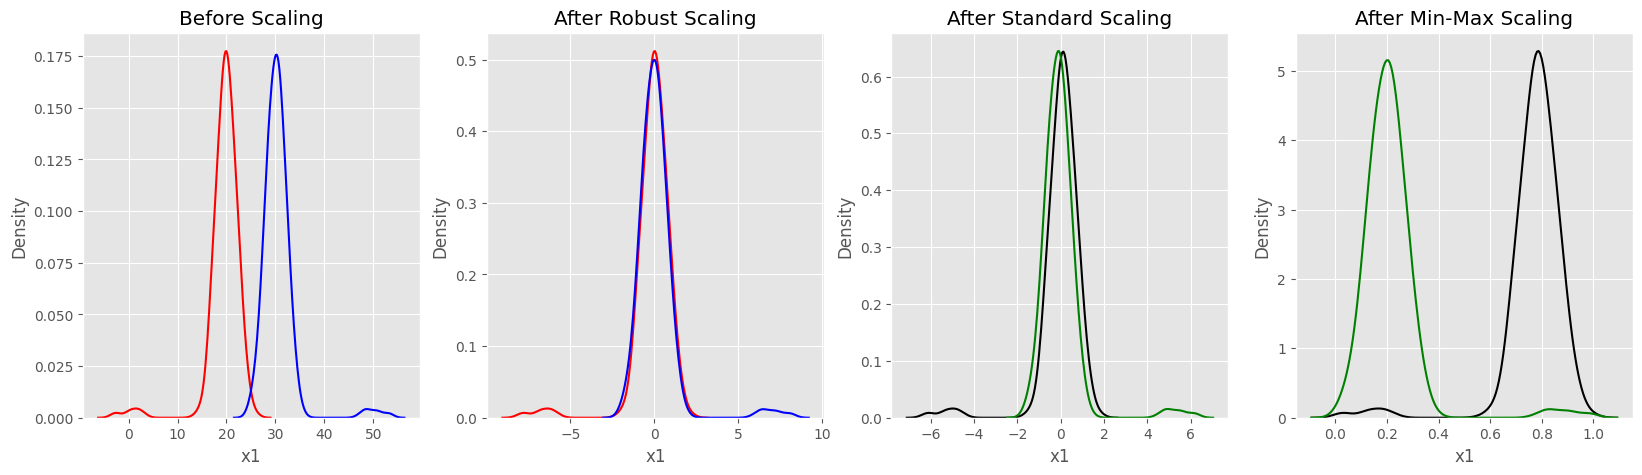

In [192]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1' : np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2' : np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns=['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns=['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns=['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols= 4, figsize=(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax = ax1, color = 'r')
sns.kdeplot(x['x2'], ax = ax1, color = 'b')

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_df['x1'], ax = ax2, color = 'red')
sns.kdeplot(robust_df['x2'], ax = ax2, color = 'blue')

ax3.set_title('After Standard Scaling')
sns.kdeplot(standard_df['x1'], ax = ax3, color = 'black')
sns.kdeplot(standard_df['x2'], ax = ax3, color = 'g')

ax4.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df['x1'], ax = ax4, color = 'black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color = 'g')

plt.show()

Handling Categorical Variables

Distribution of Categorical Values

In [193]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical values in the {col} is : ")
    print(df[col].value_counts())
    print()

The distribution of categorical values in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: Int64

The distribution of categorical values in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64

The distribution of categorical values in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64

The distribution of categorical values in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64

The distribution of categorical values in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64



Label-Based-Encoding

In [194]:
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


One-Hot-Encoding

In [195]:
df_nontree = pd.get_dummies(df, columns=string_col, drop_first=False)
bool_cols = df_nontree.select_dtypes(include=['bool']).columns
df_nontree[bool_cols] = df_nontree[bool_cols].astype(int)

# getting the target column at the end
target = "HeartDisease"
y = df_nontree[target].values
df_nontree.drop("HeartDisease", axis=1, inplace=True)
df_nontree = pd.concat([df_nontree, df[target]], axis=1)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


Model Training:

Logistic Regression

In [196]:
feature_col_nontree = df_nontree.columns.to_list()
feature_col_nontree.remove(target)

In [197]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
acc_log = []

kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]

    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]

    # print(pd.DataFrame(X_valid).head())
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)

    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    acc = roc_auc_score(y_valid, y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold + 1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.93      0.83      0.88       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

The accuracy for Fold 1 : 0.8800813008130083
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.91      0.80      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for Fold 2 : 0.8531802965088474
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                       

Naive Bayers

In [198]:
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

acc_Gauss = []
kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate (kf.split(X=df_nontree, y=y)):
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]

    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]

    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)

    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    acc = roc_auc_score(y_valid, y_pred)
    acc_Gauss.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        82
           1       0.93      0.79      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.87      0.85      0.85       184

The accuracy for 1 : 0.8604734576757532
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        82
           1       0.93      0.85      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

The accuracy for 2 : 0.8837876614060258
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.63      0.76        82
           1       0.77      0.98      0.86       102

    accuracy                           0.83  

SVM (Support Vector Machines)

Linear Kernel:

In [199]:
from sklearn.svm import SVC
acc_svm = []
kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]

    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]

    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)

    clf = SVC(kernel="linear")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    acc = roc_auc_score(y_valid, y_pred)
    acc_svm.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")
    pass


The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        82
           1       0.92      0.82      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

The accuracy for 1 : 0.8690817790530847
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                           0.83  

Sigmoid Kernel:

In [200]:
from sklearn.svm import SVC
acc_svm_sig = []
kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]

    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]

    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)

    clf = SVC(kernel="sigmoid")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f" The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    acc = roc_auc_score(y_valid, y_pred)
    acc_svm_sig.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")
    pass

 The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        82
           1       0.87      0.86      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

The accuracy for 1 : 0.852104256336681
 The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        82
           1       0.80      0.75      0.77       102

    accuracy                           0.76       184
   macro avg       0.75      0.76      0.75       184
weighted avg       0.76      0.76      0.76       184

The accuracy for 2 : 0.7566953610712578
 The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.85      0.73      0.78        82
           1       0.81      0.89      0.85       102

    accuracy                           0.82

RBF Kernel:

In [201]:
from sklearn.svm import SVC
acc_svm_rbf = []
kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]

    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]

    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)

    clf = SVC(kernel="rbf")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    acc = roc_auc_score(y_valid, y_pred)
    acc_svm_rbf.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        82
           1       0.91      0.93      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

The accuracy for 1 : 0.9108082257293162
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8433763749402199
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.89      0.70      0.78        82
           1       0.79      0.93      0.86       102

    accuracy                           0.83  

Polynomial Kernel:

In [202]:
from sklearn.svm import SVC
acc_svm_poly = []
kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]

    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]

    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)

    clf = SVC(kernel="poly")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    acc = roc_auc_score(y_valid, y_pred)
    acc_svm_poly.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        82
           1       0.92      0.89      0.91       102

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

The accuracy for 1 : 0.897297943567671
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8433763749402199
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.93      0.63      0.75        82
           1       0.77      0.96      0.85       102

    accuracy                           0.82   

K-Nearest Neighbors

In [203]:
from sklearn.neighbors import KNeighborsClassifier
acc_KNN = []
kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]

    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]

    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)

    clf = KNeighborsClassifier(n_neighbors=32)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    acc = roc_auc_score(y_valid, y_pred)
    acc_KNN.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        82
           1       0.93      0.93      0.93       102

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184

The accuracy for 1 : 0.9230033476805357
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        82
           1       0.91      0.79      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8482783357245336
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        82
           1       0.81      0.95      0.87       102

    accuracy                           0.85  

Decision Tree Classifier

In [204]:
feature_col_tree = df_tree.columns.to_list()
feature_col_tree.remove(target)

In [205]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree = []
kf=model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_tree, y=y)):
    X_train = df_tree.loc[trn_, feature_col_tree]
    y_train = df_tree.loc[trn_, target]

    X_valid = df_tree.loc[val_, feature_col_tree]
    y_valid = df_tree.loc[val_, target]

    clf = DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    acc = roc_auc_score(y_valid, y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        82
           1       0.85      0.66      0.74       102

    accuracy                           0.74       184
   macro avg       0.76      0.76      0.74       184
weighted avg       0.77      0.74      0.74       184

The accuracy for 1 : 0.7552606408417025
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.67      0.88      0.76        82
           1       0.87      0.65      0.74       102

    accuracy                           0.75       184
   macro avg       0.77      0.76      0.75       184
weighted avg       0.78      0.75      0.75       184

The accuracy for 2 : 0.7625538020086082
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        82
           1       0.75      0.92      0.83       102

    accuracy                           0.79  

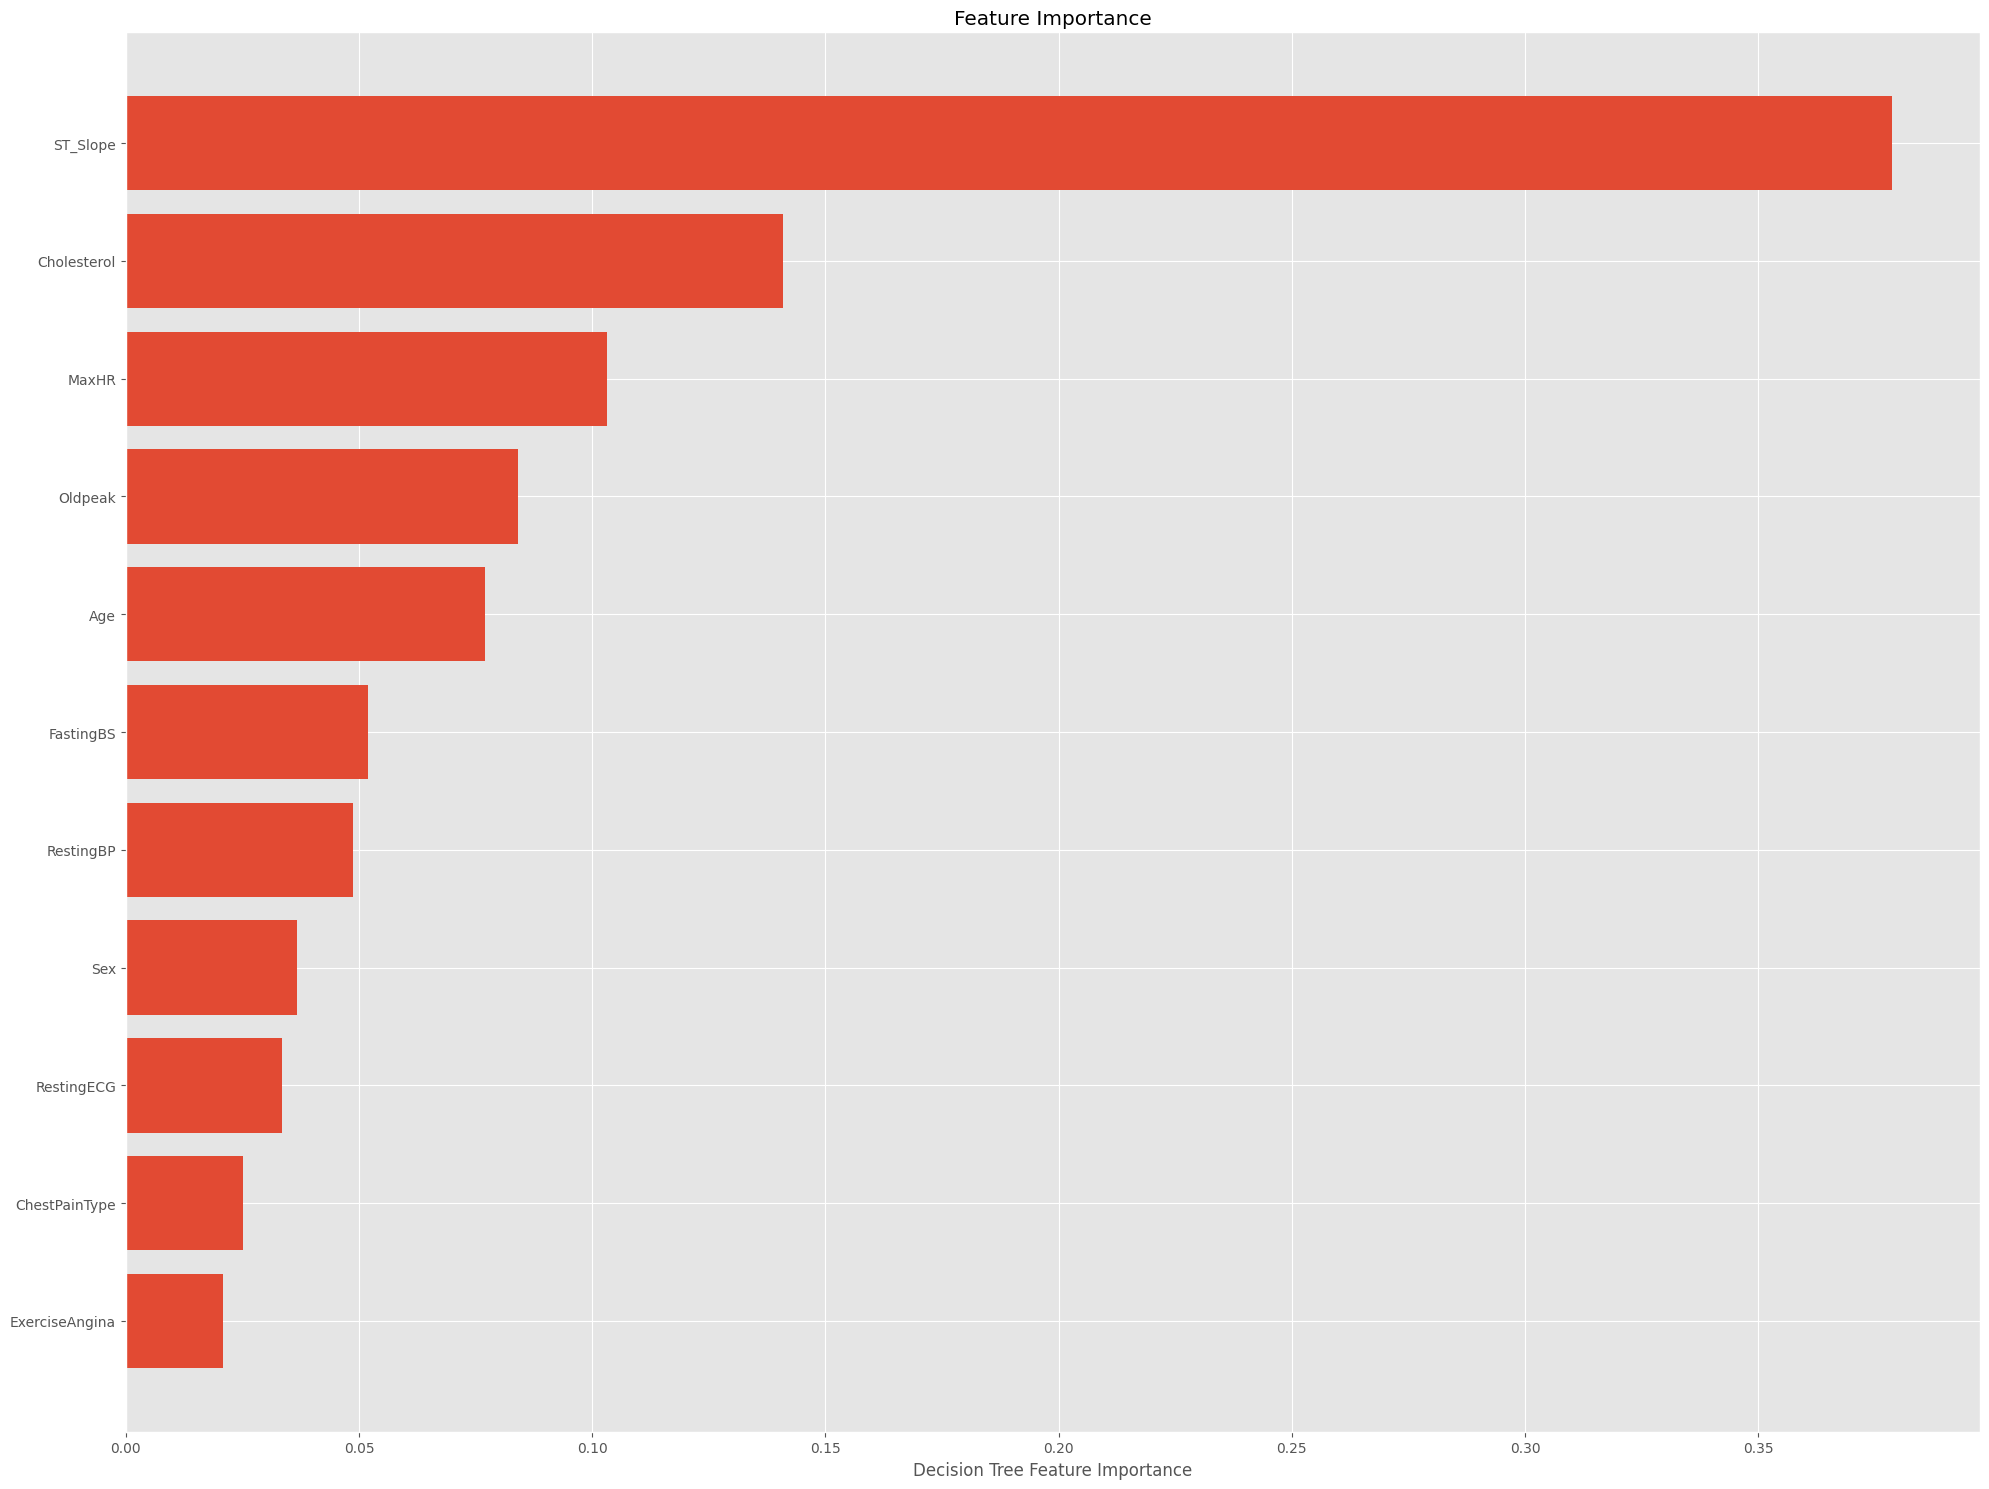

In [206]:
plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)), importance[idxs], align="center")
plt.yticks(range(len(idxs)), [feature_col_tree[i] for i in idxs])
plt.xlabel("Decision Tree Feature Importance")
plt.tight_layout()
plt.show()

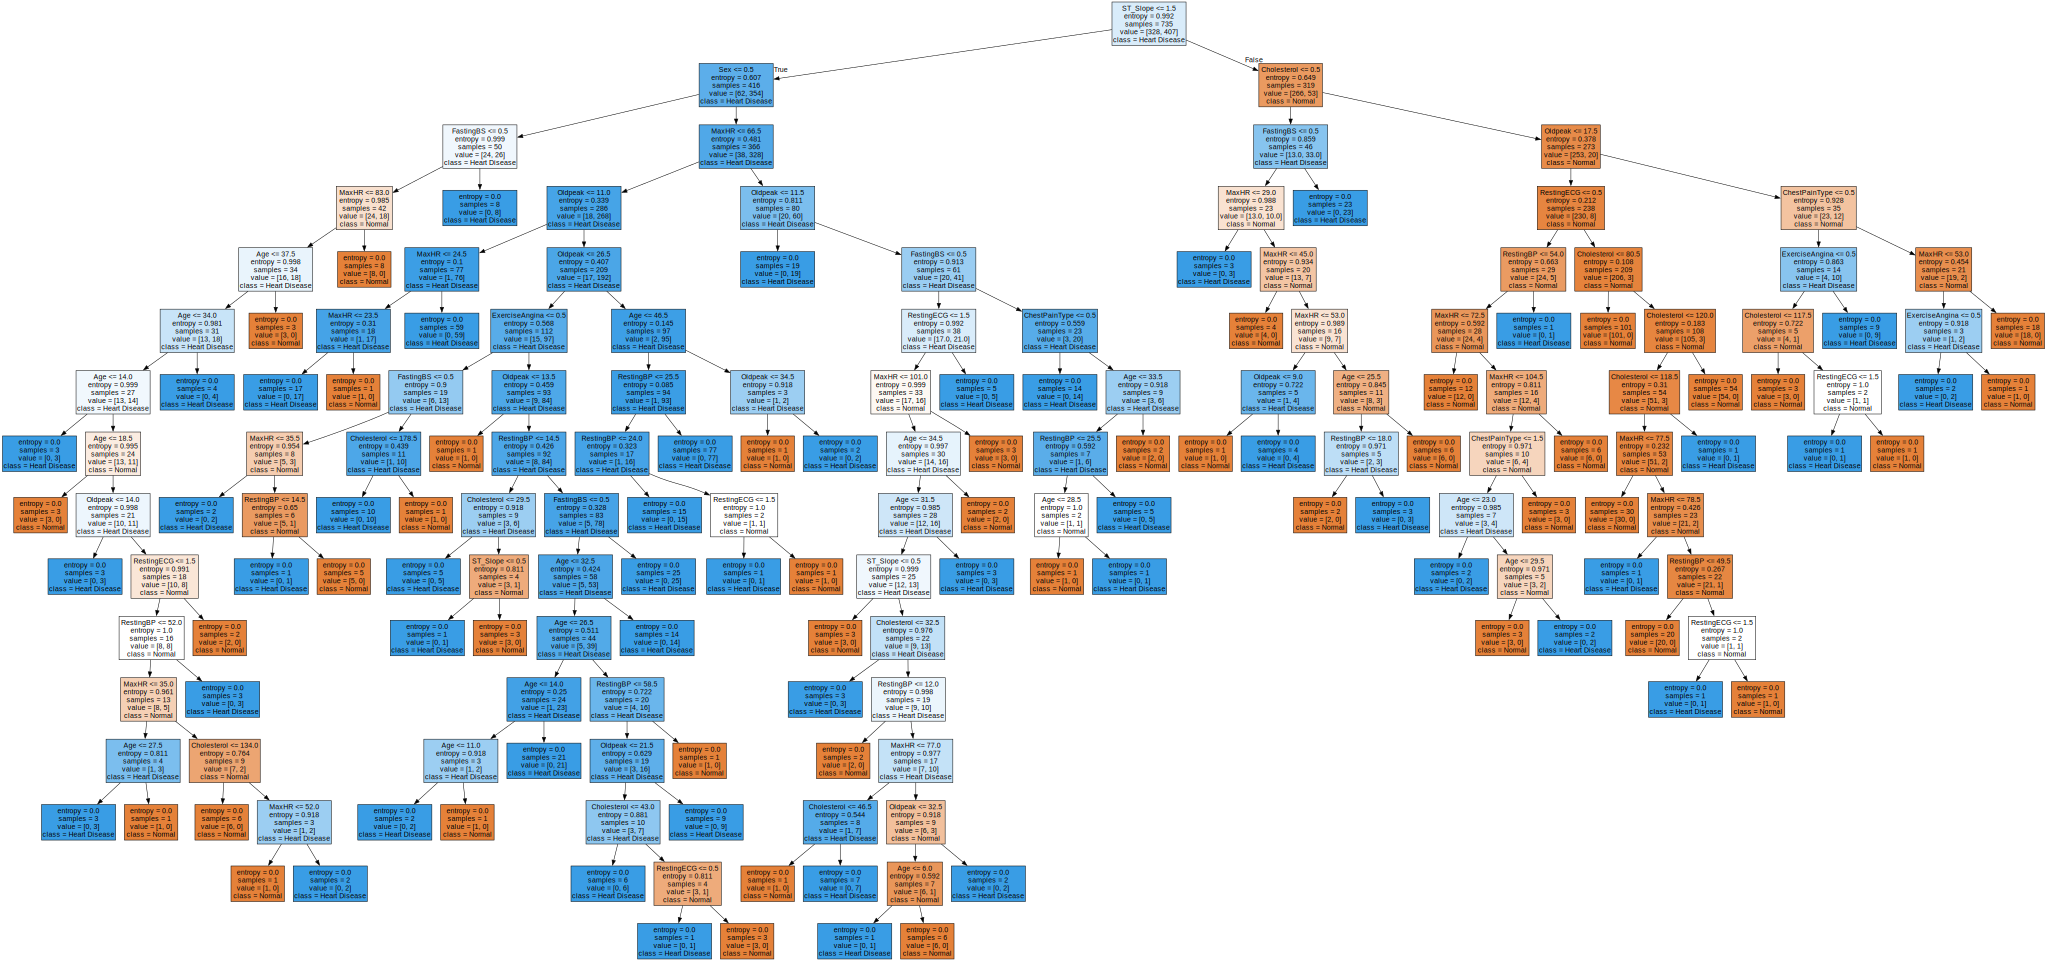

In [207]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, 
                                out_file=None,
                                feature_names=feature_col_tree,
                                class_names=["Normal","Heart Disease"],
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph

Random Forest Classifier

In [208]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF = []
kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_tree, y=y)):
    X_train = df_tree.loc[trn_, feature_col_tree]
    y_train = df_tree.loc[trn_, target]

    X_valid = df_tree.loc[val_, feature_col_tree]
    y_valid = df_tree.loc[val_, target]

    clf = RandomForestClassifier(n_estimators=200, criterion='entropy')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    acc = roc_auc_score(y_valid, y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        82
           1       0.91      0.84      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

The accuracy for 1 : 0.8727881396461025
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.98      0.61      0.75        82
           1       0.76      0.99      0.86       102

    accuracy                           0.82  

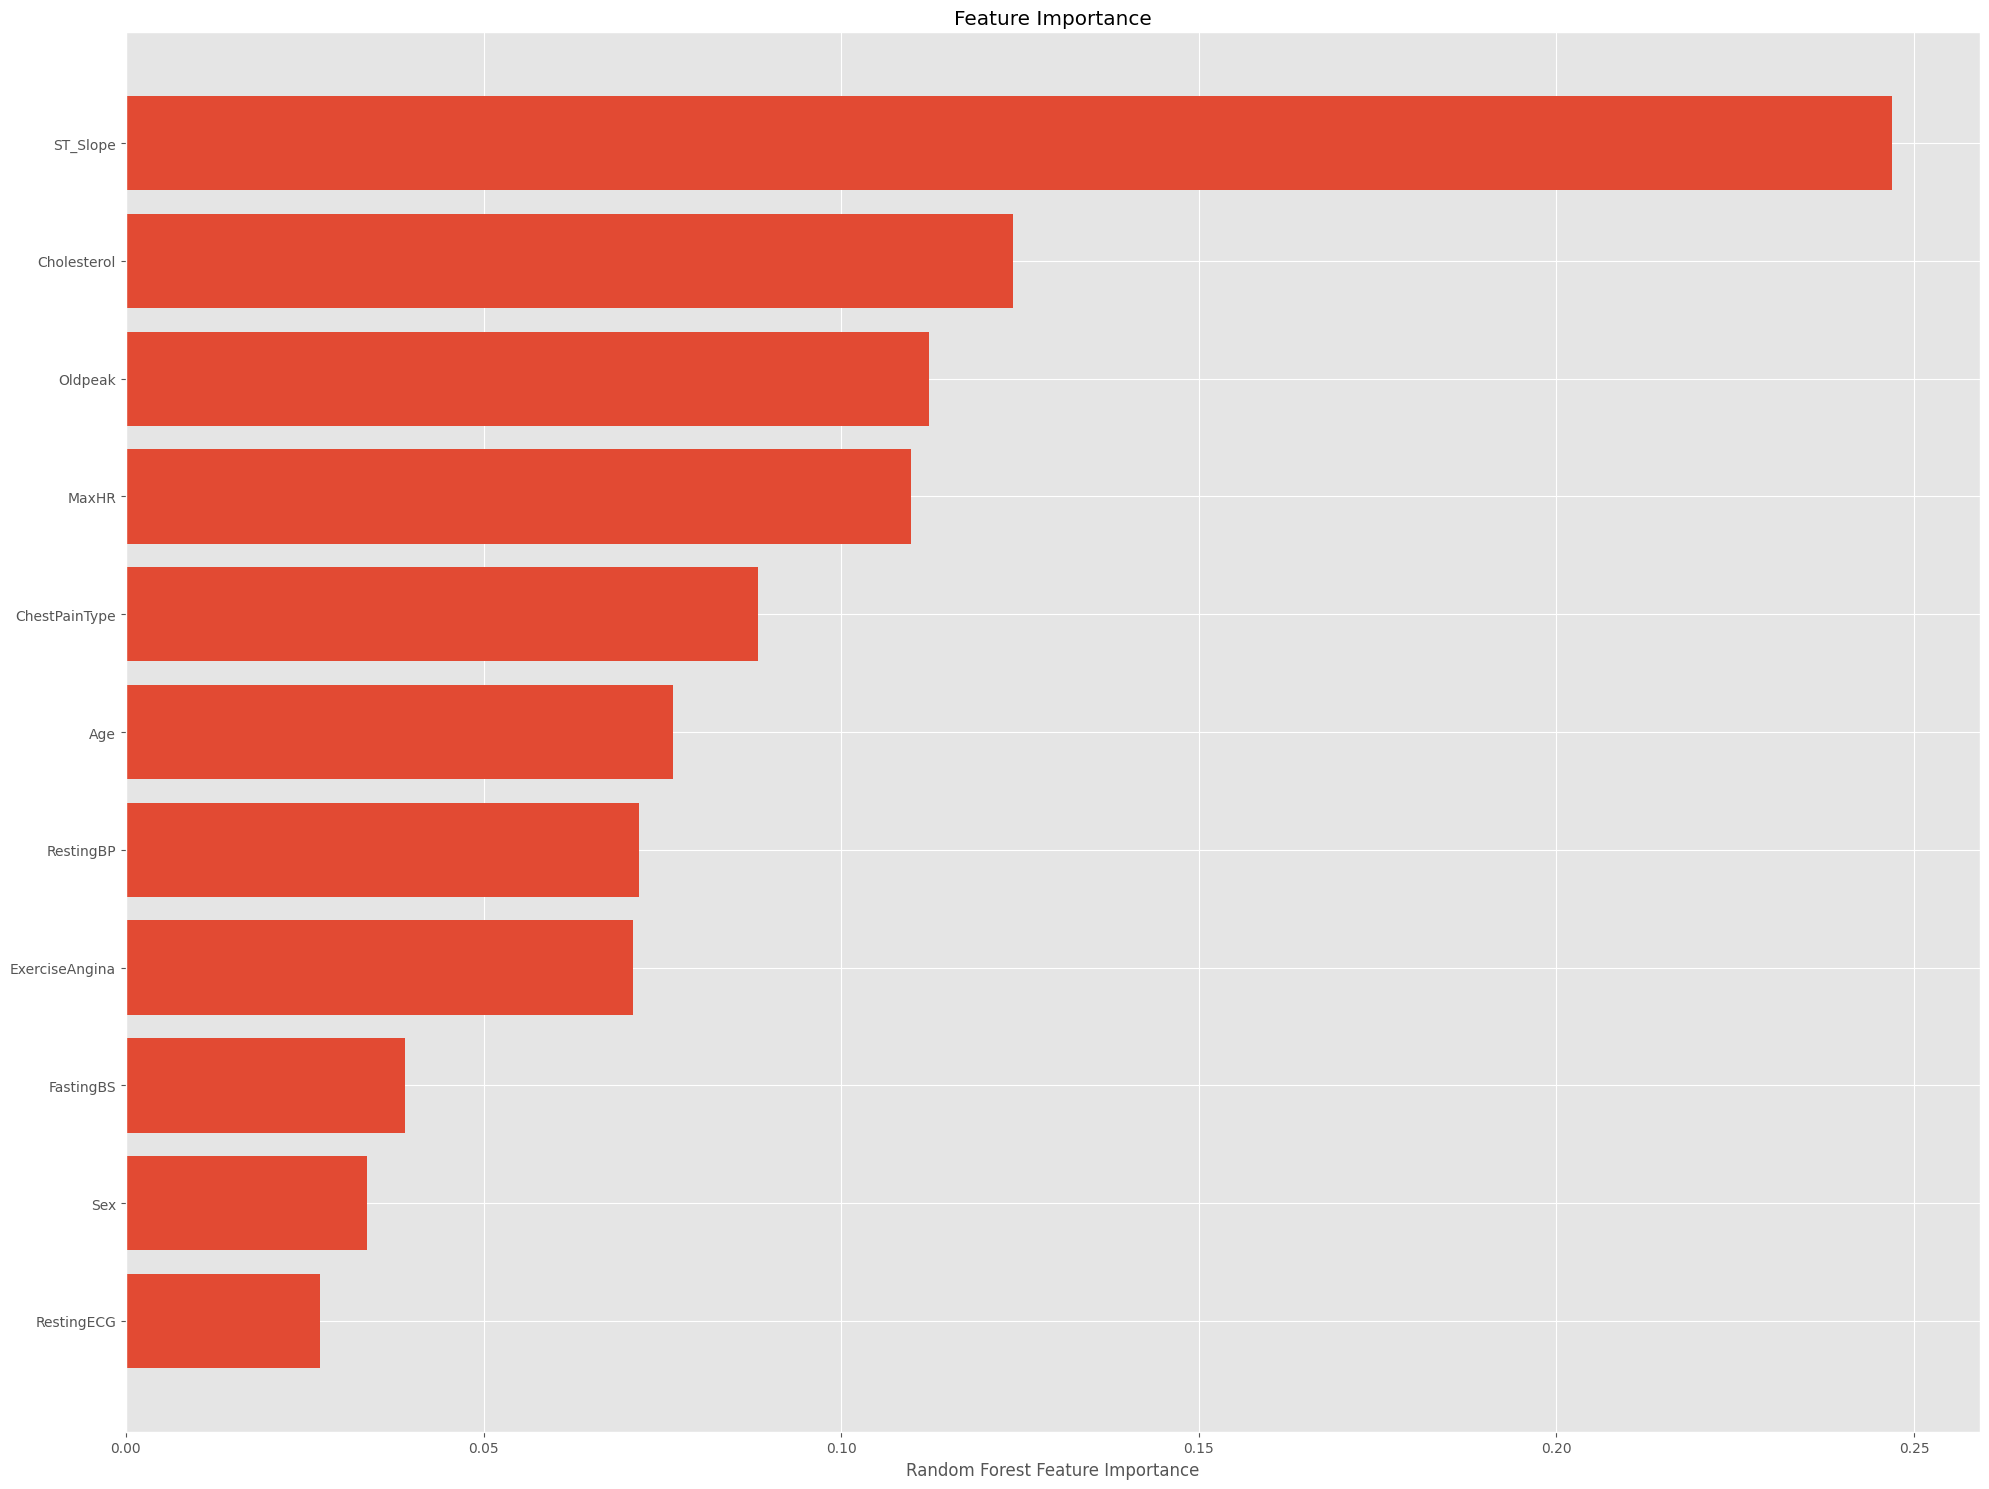

In [209]:
# checking feature importance
plt.figure(figsize=(20, 15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)), importance[idxs], align="center")
plt.yticks(range(len(idxs)), [feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

In [210]:
# Number of decision trees in the trained model
len(clf.estimators_)

200

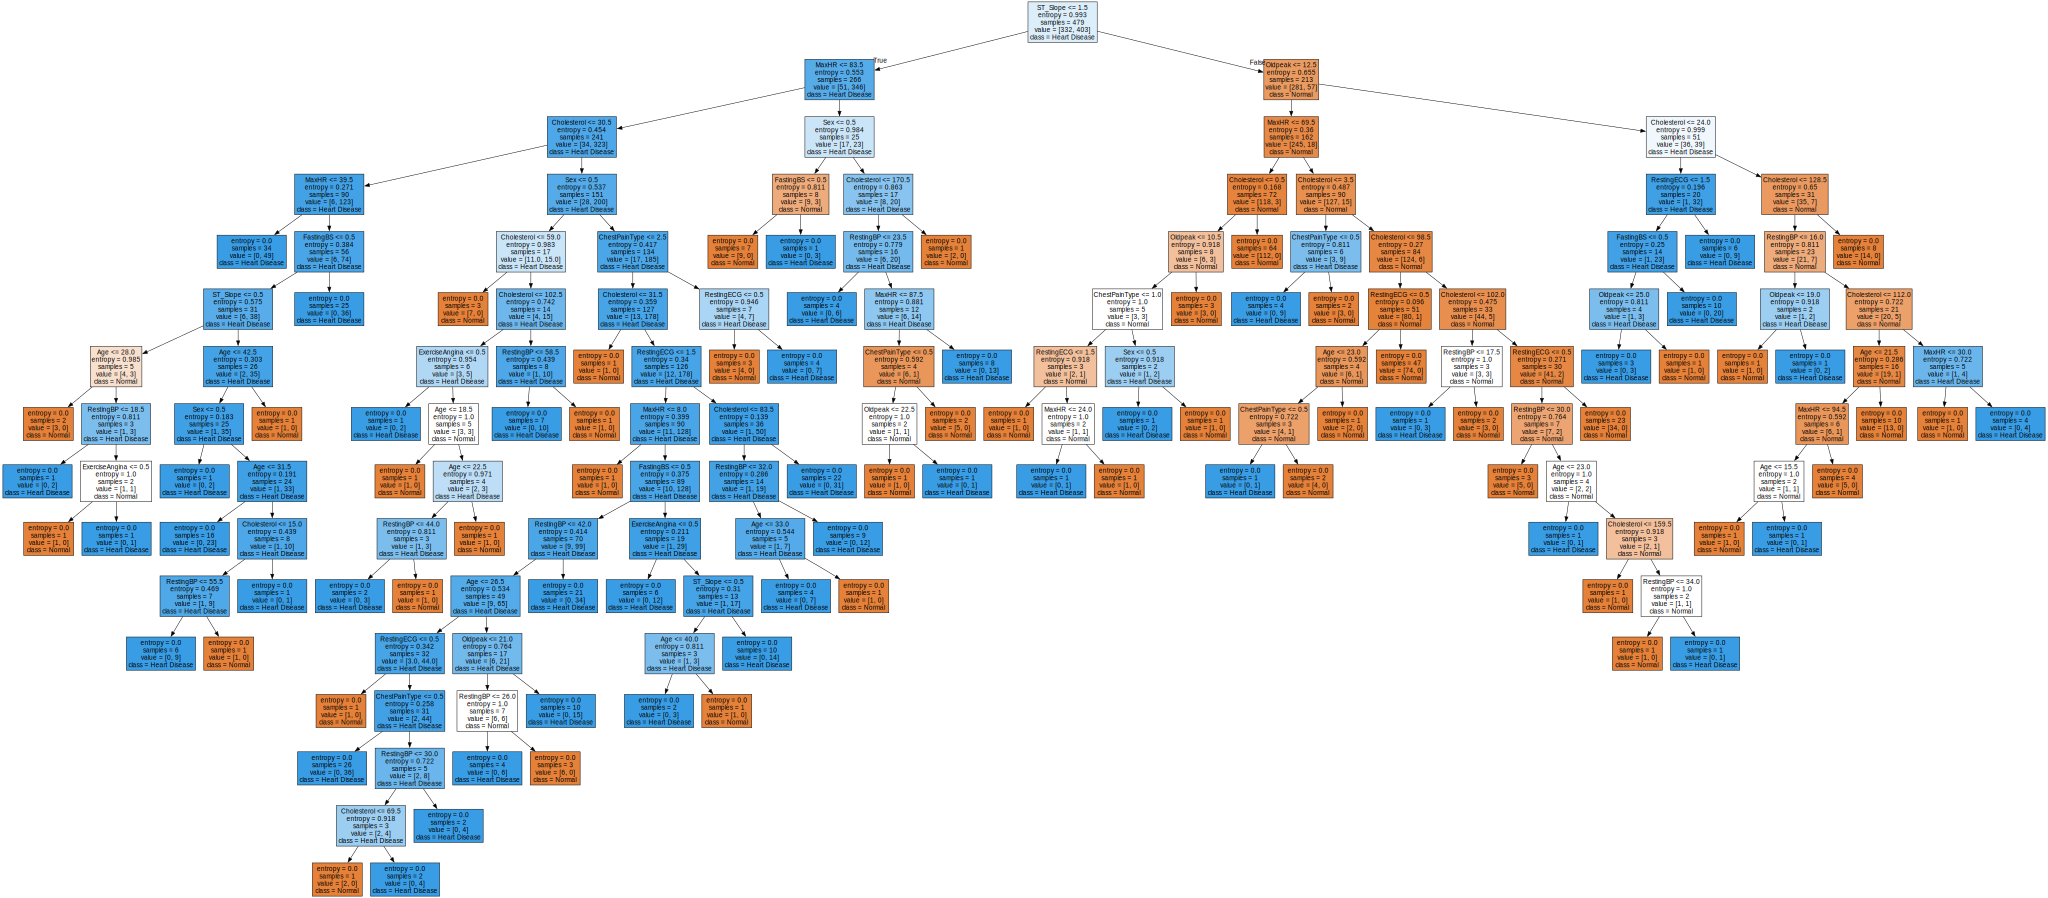

In [211]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf.estimators_[0], # first decision tree
                                out_file=None,
                                feature_names=feature_col_tree,
                                class_names=["Normal", "Heart Disease"],
                                filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

XGBoost

In [212]:
from xgboost import XGBClassifier
acc_XGB = []
kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_tree, y=y)):
    X_train = df_tree.loc[trn_, feature_col_tree]
    y_train = df_tree.loc[trn_, target]

    X_valid = df_tree.loc[val_, feature_col_tree]
    y_valid = df_tree.loc[val_, target]

    clf = XGBClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    acc = roc_auc_score(y_valid, y_pred)
    acc_XGB.append(acc)
    print(f"The accuracy for {fold + 1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        82
           1       0.93      0.84      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184

The accuracy for 1 : 0.884983261597322
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.61      0.75        82
           1       0.76      0.98      0.85       102

    accuracy                           0.82   

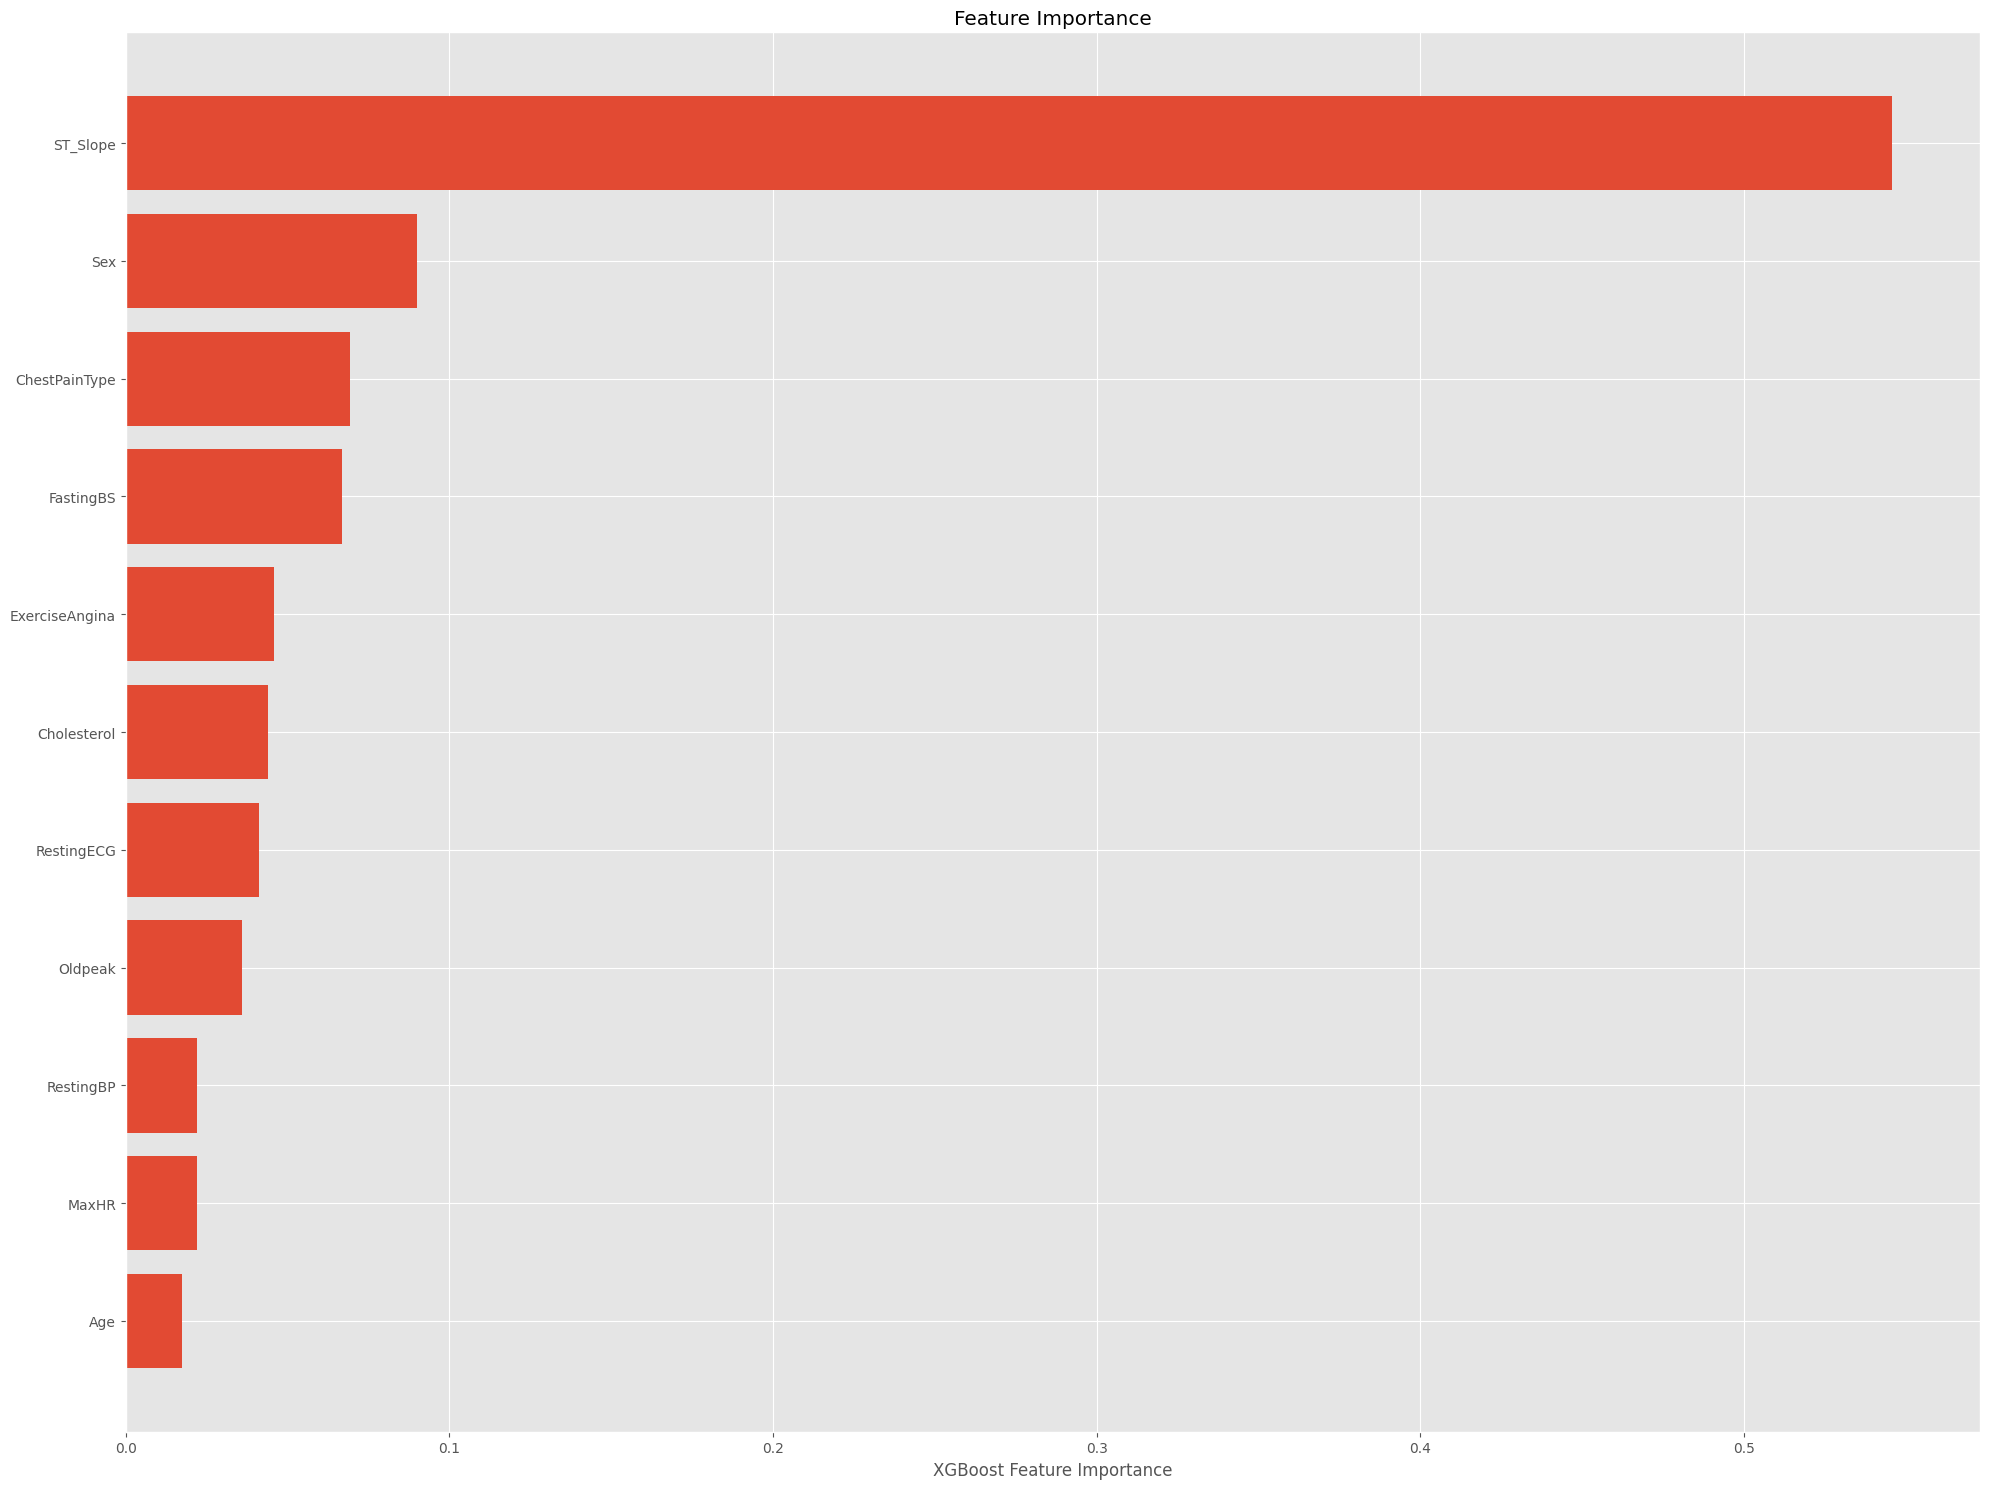

In [213]:
plt.figure(figsize=(20, 15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)), importance[idxs], align="center")
plt.yticks(range(len(idxs)), [feature_col_tree[i] for i in idxs])
plt.xlabel("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

In [214]:
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(300, 300))
plot_tree(clf, ax=ax)
plt.show()